In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pd.set_option('display.max_columns', None)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
income_data = pd.read_csv('Family Income and Expenditure.csv')

In [7]:
income_data.head(10)

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Electricity,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,3,0,1,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,Single Family,6,0,4,3,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...",0,"Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,Single Family,3,0,3,2,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,1,"Own use, faucet, community water system",1,0,0,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,Male,65,Married,Elementary Graduate,With Job/Business,General managers/managing proprietors in trans...,Self-employed wihout any employee,Single Family,4,0,0,2,Single house,"Light material (cogon,nipa,an

In [10]:
"""First thing I want to is to check if there are missing values in my dataset. 
I accomplish this using the missingno library's Matrix method. This helps me visualize where the null values are."""

"First thing I want to is to check if there are missing values in my dataset. \nI accomplish this using the missingno library's Matrix method. This helps me visualize where the null values are."

In [11]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [12]:
import missingno as msno

<Axes: >

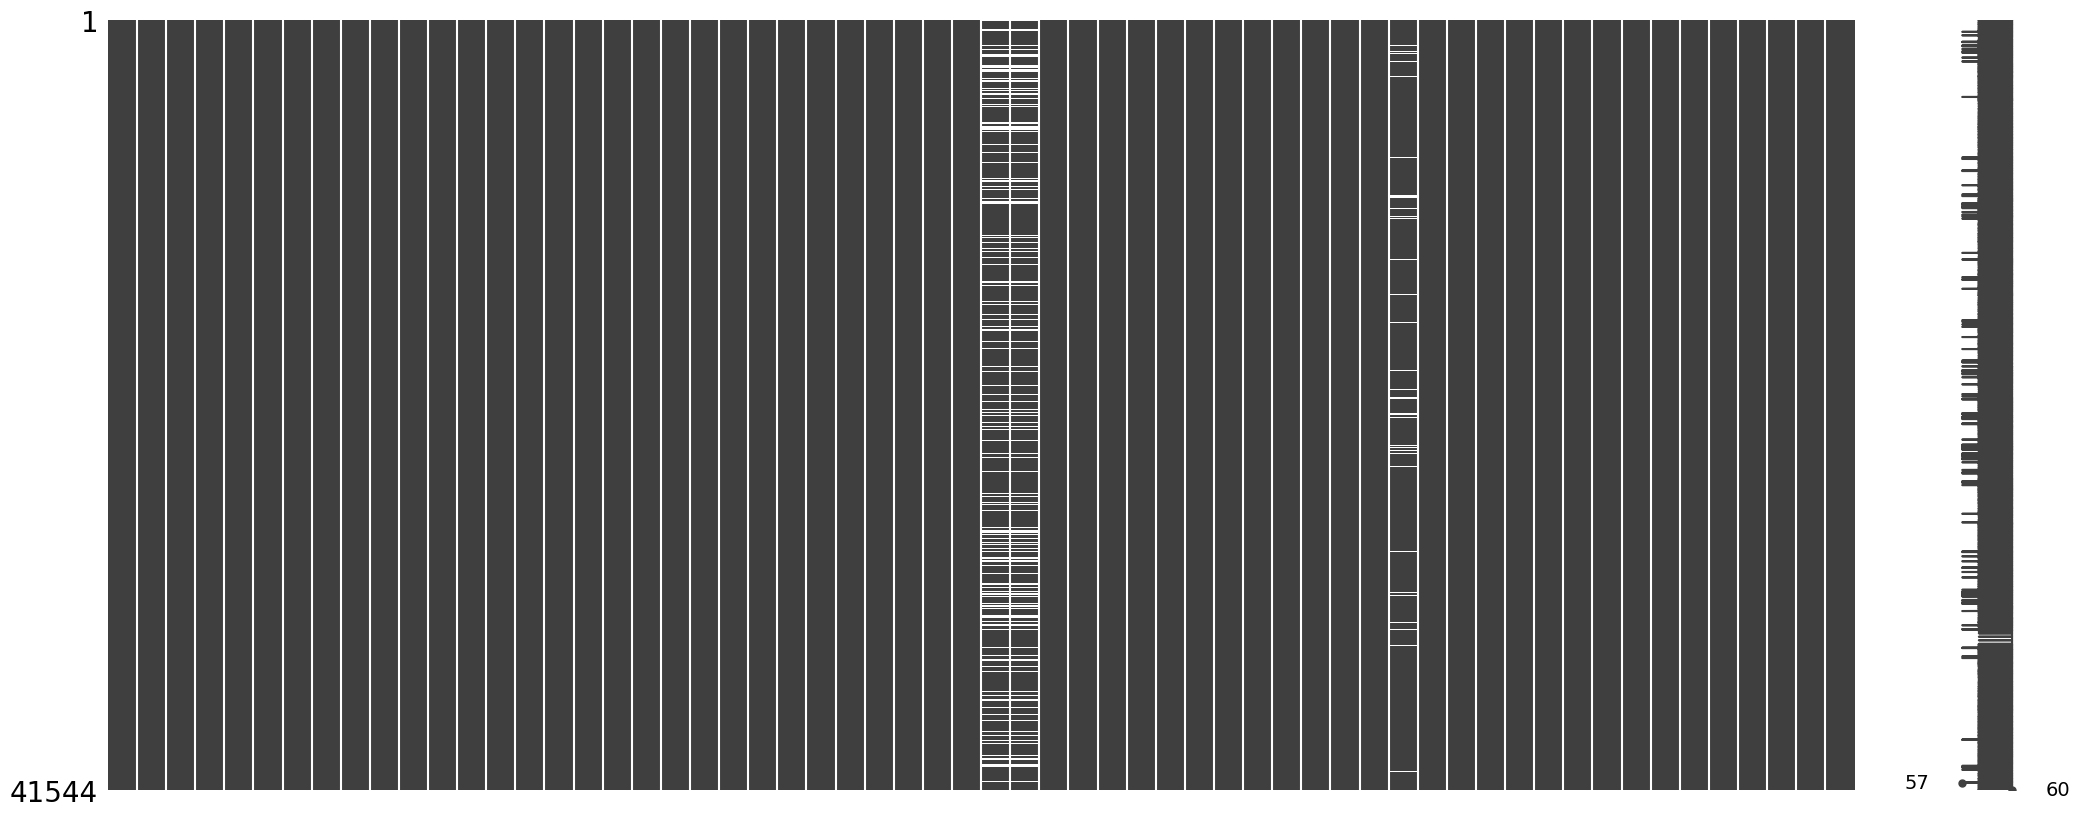

In [13]:
msno.matrix(income_data)

In [ ]:
Make a model to predict total household income, using the household expenditures

In [16]:
expenditure = [column for column in income_data.columns if 'Expenditure' in column]

In [17]:
expenditure

['Total Food Expenditure',
 'Bread and Cereals Expenditure',
 'Total Rice Expenditure',
 'Meat Expenditure',
 'Total Fish and  marine products Expenditure',
 'Fruit Expenditure',
 'Vegetables Expenditure',
 'Restaurant and hotels Expenditure',
 'Alcoholic Beverages Expenditure',
 'Tobacco Expenditure',
 'Clothing, Footwear and Other Wear Expenditure',
 'Housing and water Expenditure',
 'Medical Care Expenditure',
 'Transportation Expenditure',
 'Communication Expenditure',
 'Education Expenditure',
 'Miscellaneous Goods and Services Expenditure',
 'Special Occasions Expenditure']

In [ ]:
"""I set my features as the splice of the original dataset where the column names are expenditures, 
and set the target as the Total Household Income column"""

In [22]:
#importing the necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression, Lasso
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import Normalizer, PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.decomposition import IncrementalPCA, SparsePCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, precision_score,recall_score, classification_report, confusion_matrix

In [28]:
X = income_data.loc[:, expenditure]
Y = income_data['Total Household Income']

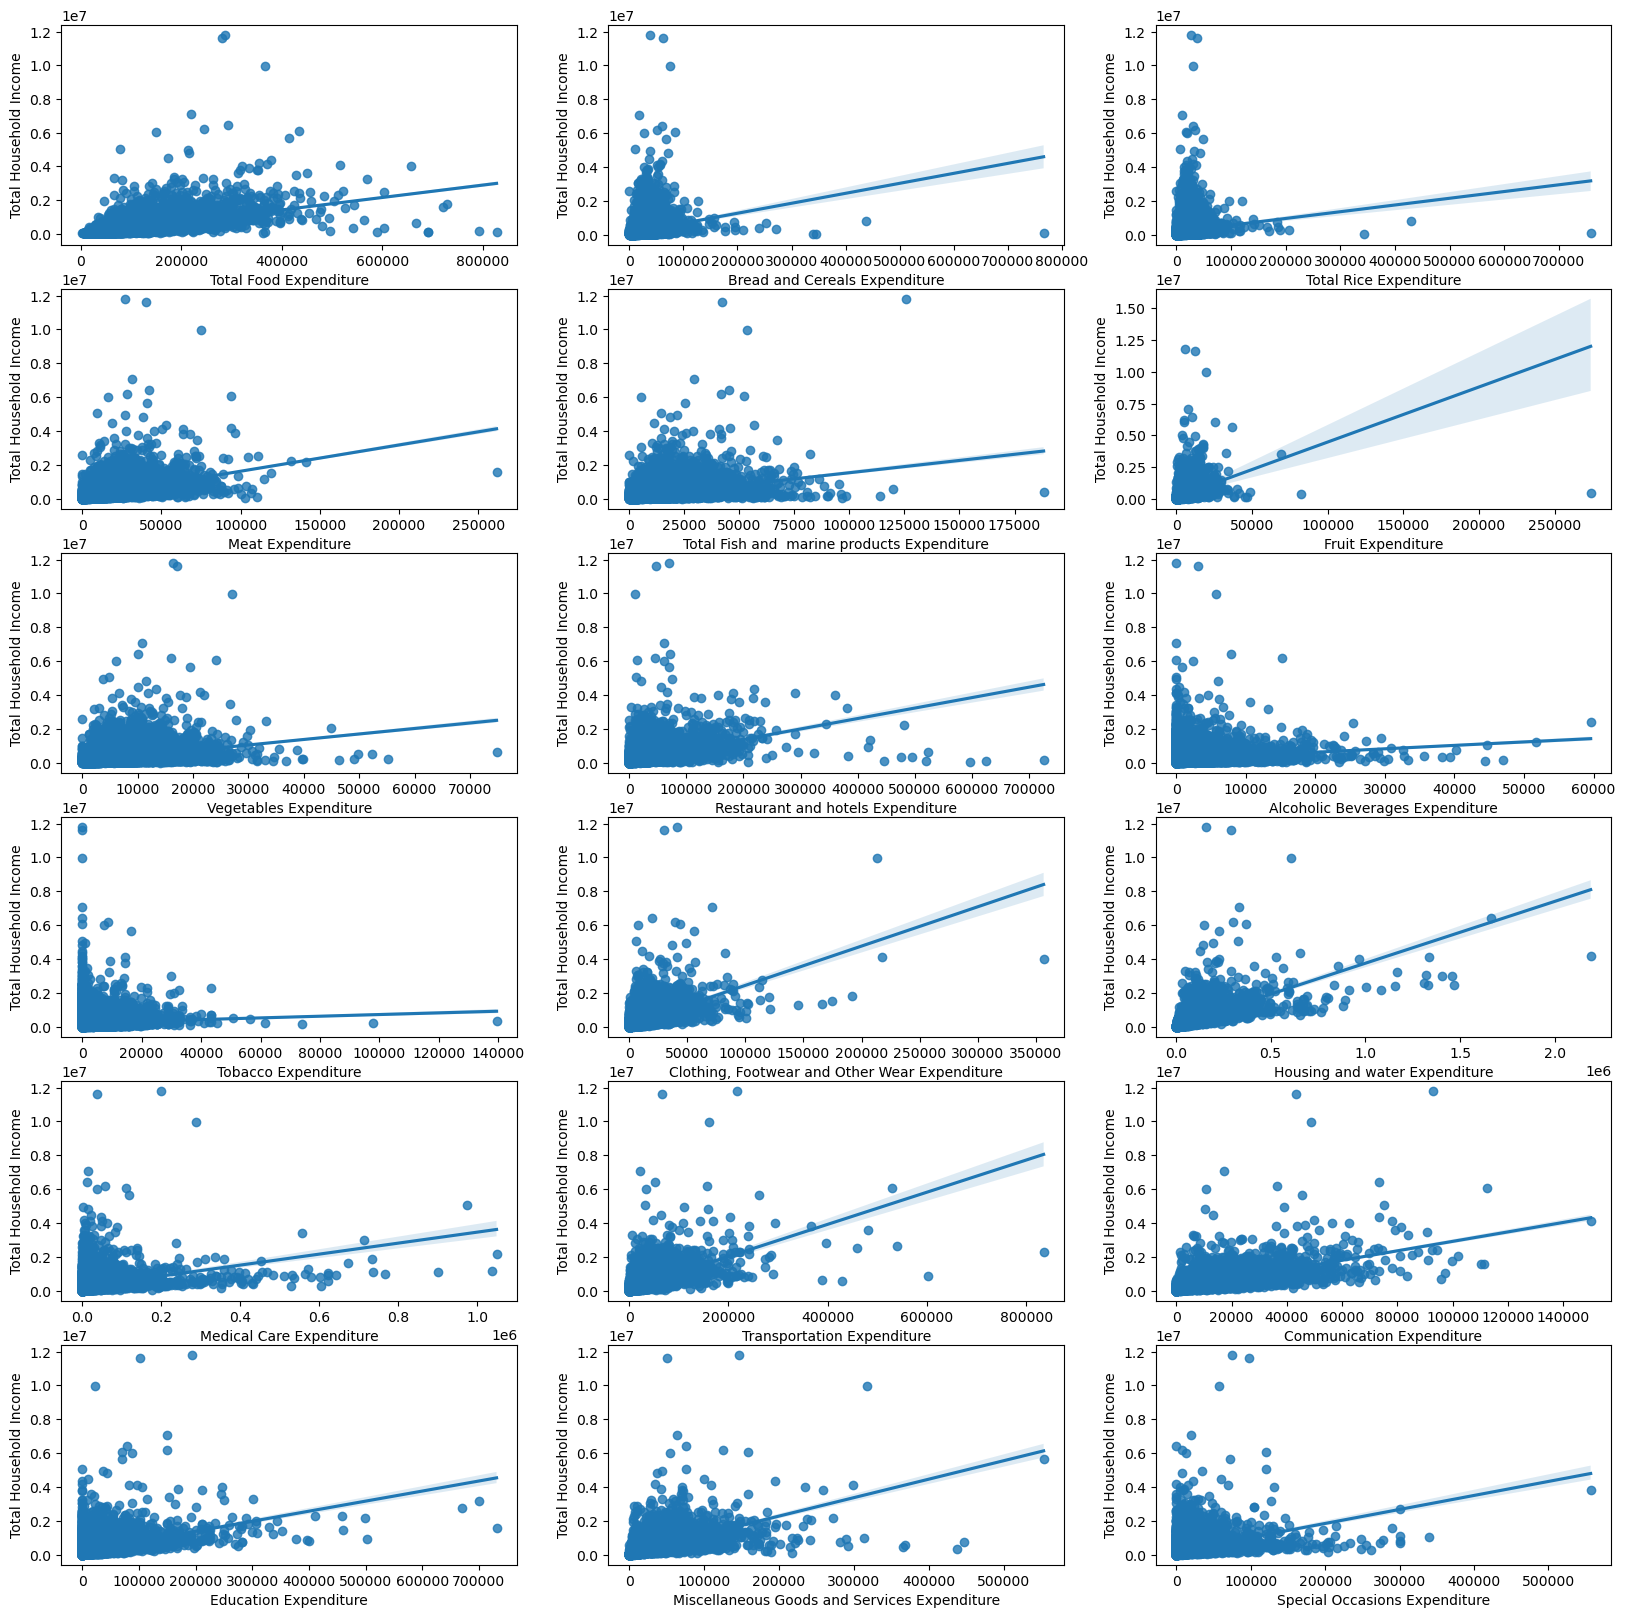

In [31]:
plt.figure(figsize=(20,20))
i =1
for exp in expenditure :
    plt.subplot(6,3,i)
    sns.regplot(x=X[exp], y=Y)
    i += 1

In [33]:
Xy = X.copy()
Xy['THI'] = Y

In [ ]:
Xy_corr = Xy.corr()

<Axes: >

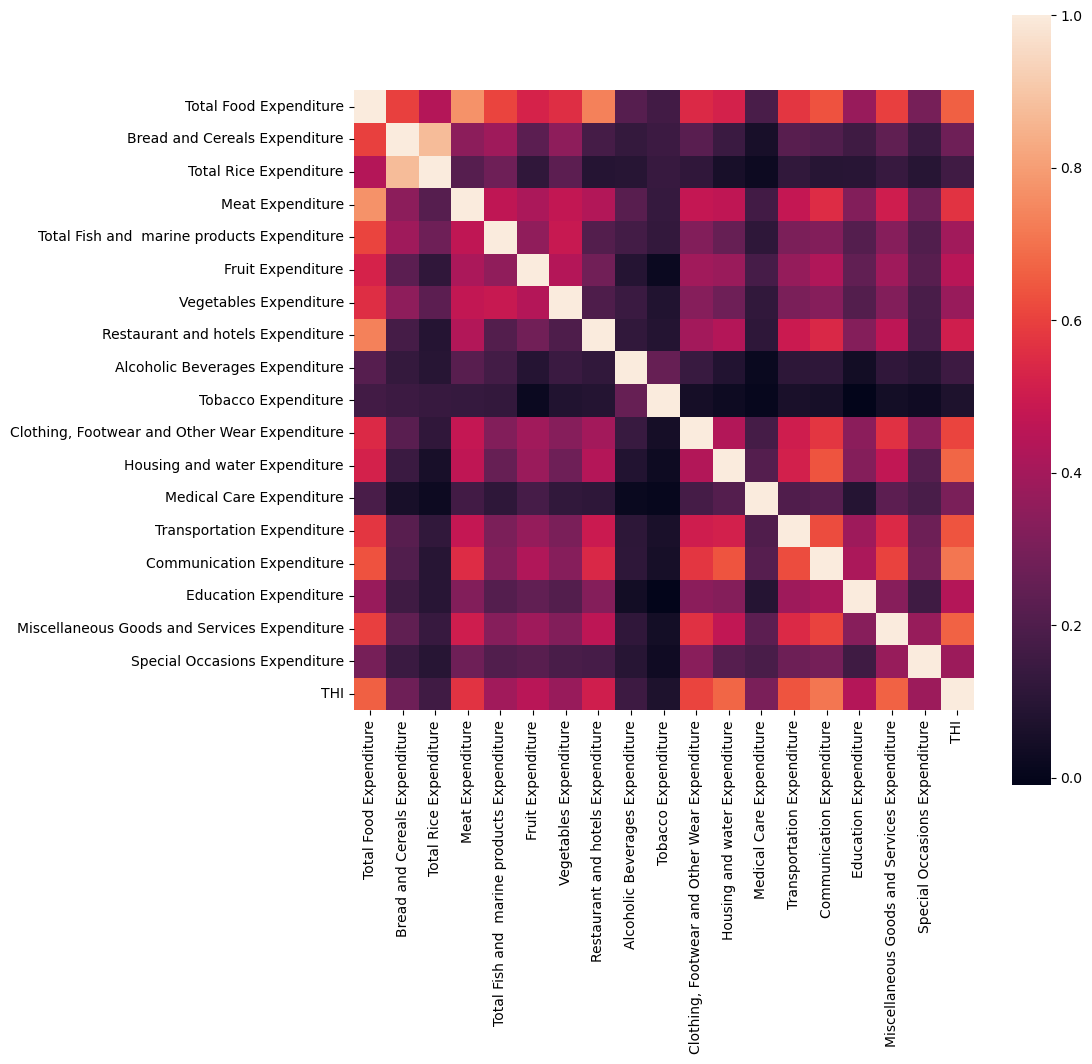

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(Xy.corr(), square=True)

In [ ]:
"""From here, it seems like the best correlation I have is 0.8, which is Total Rice Expenditure and Bread and Cereals Expenditure. Next to that, we have Total Food Expenditure has a somehow high correlation value with Meat Expenditure and Vegetables Expenditure. Makes sense especially that Pinoys 
are a culture of rice and ulam. It's not surprising that these are related."""

<Axes: xlabel='Total Food Expenditure', ylabel='Meat Expenditure'>

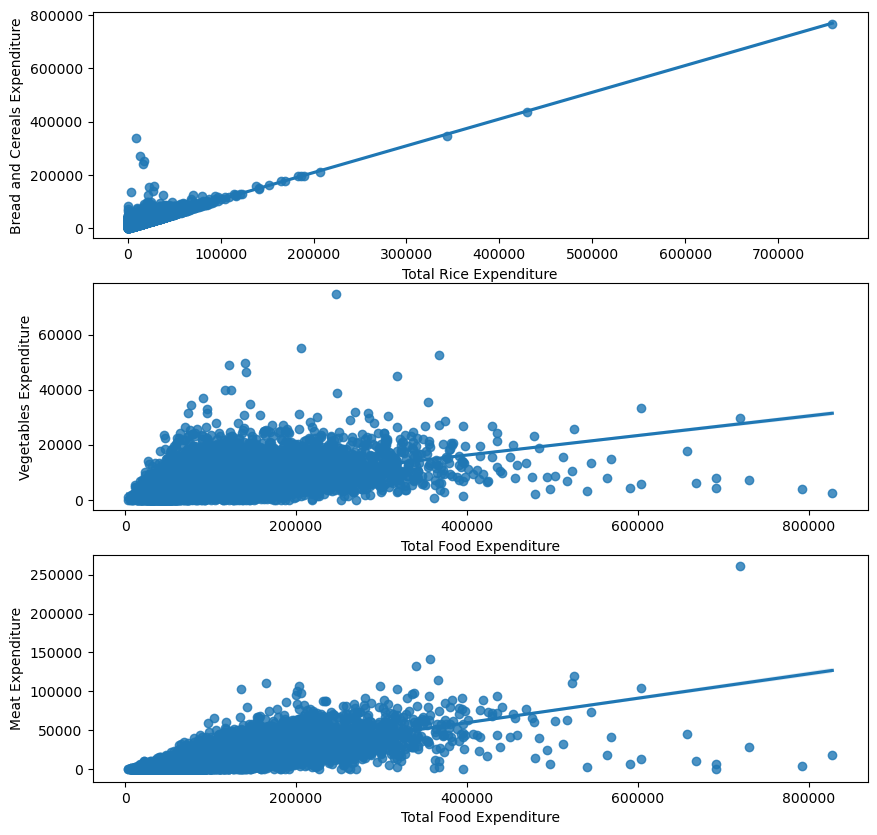

In [39]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.regplot(x=income_data['Total Rice Expenditure'],
            y=income_data['Bread and Cereals Expenditure'])
plt.subplot(3,1,2)
sns.regplot(x=income_data['Total Food Expenditure'],
            y=income_data['Vegetables Expenditure'])
plt.subplot(3,1,3)
sns.regplot(x=income_data['Total Food Expenditure'],
            y=income_data['Meat Expenditure'])

In [ ]:
"""At this point, I want to show how skewed the data is. This is to set my expectation for regression modelling later."""

C:\Users\Baha\AppData\Local\Temp\ipykernel_13196\2478545701.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[exp])
C:\Users\Baha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Baha\AppData\Local\Temp\ipykernel_13196\2478545701.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `his

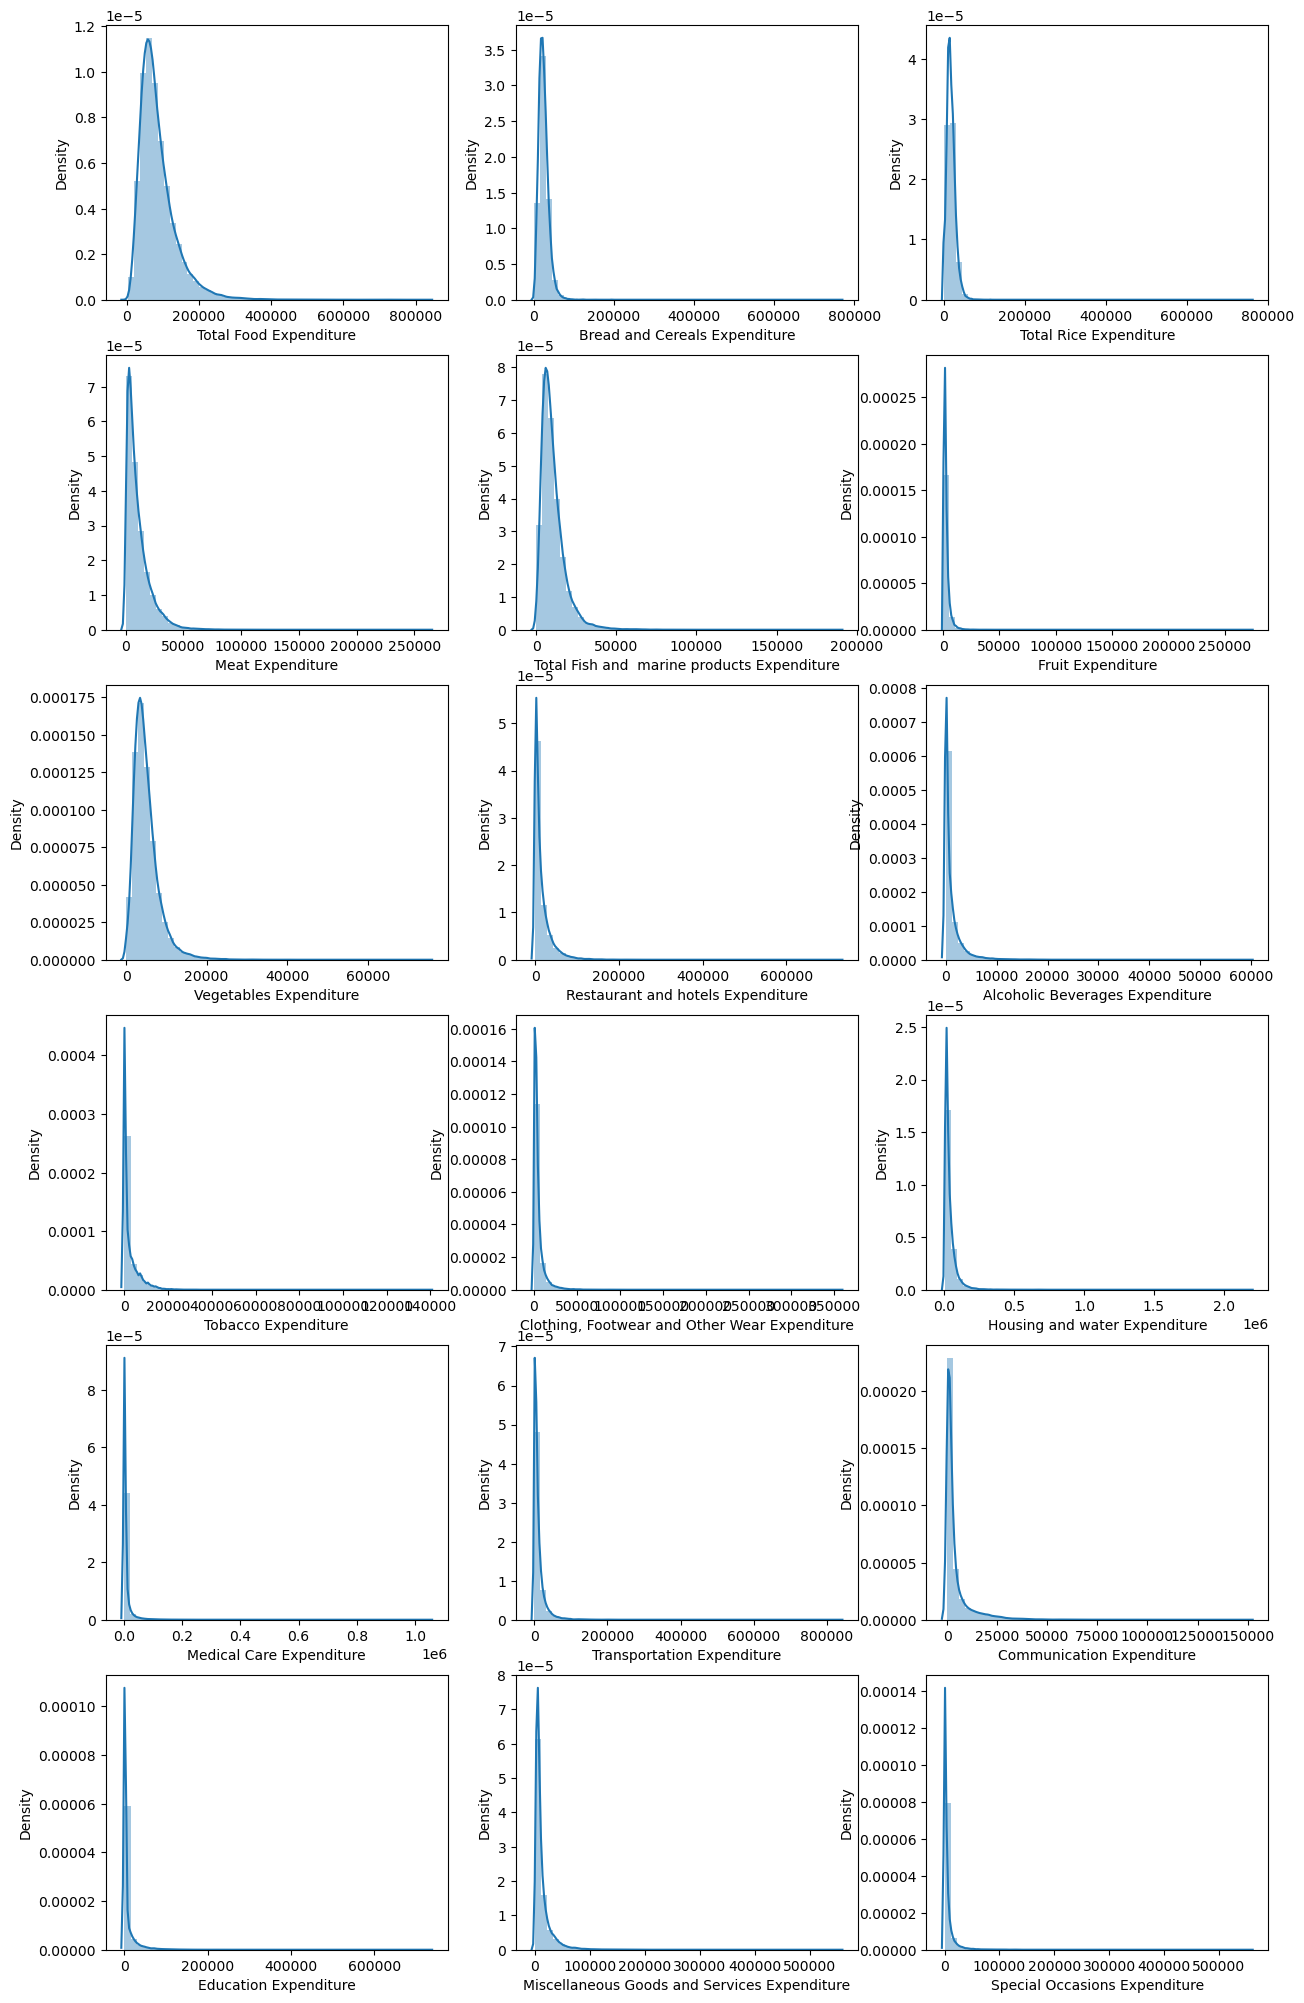

In [41]:
plt.figure(figsize=(15,25))
i=1
for exp in expenditure :
    plt.subplot(6,3,i)
    sns.distplot(X[exp])
    i+=1

C:\Users\Baha\AppData\Local\Temp\ipykernel_13196\168880564.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y, bins=1000)
C:\Users\Baha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Total Household Income', ylabel='Density'>

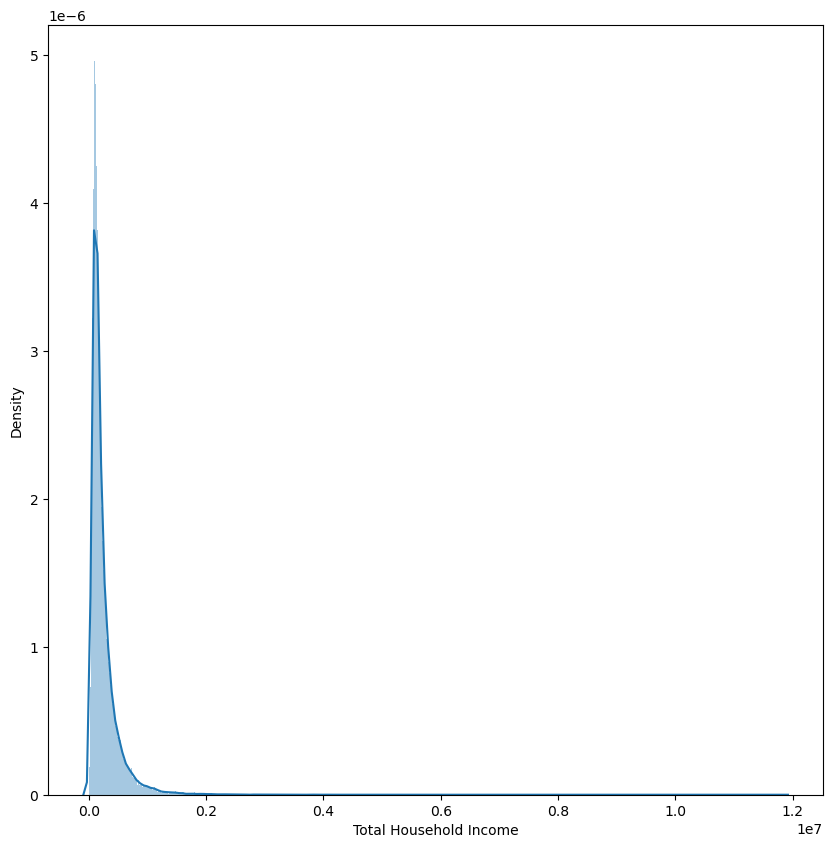

In [43]:
#the disribution of total household income
plt.figure(figsize=(10,10))
sns.distplot(Y, bins=1000)

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=41)

In [46]:
#Random forest regressor
#I'm setting verbose to True so that I can see what's happening under the model as it happens.
randomforest=RandomForestRegressor(verbose = True, n_jobs=-1, n_estimators=1000)
randomforest.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 12.1min finished


RandomForestRegressor(n_estimators=1000, n_jobs=-1, verbose=True)

In [47]:
randomforest.score(X_test, y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.7s finished


0.7613634768182593

In [ ]:
"""Let's visually observe how the predicted values and the actual values correlate in a 45-degree line. The closer the points are in the line, the more it tells us that 
the model we selected did a great job in terms of predicting values."""

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    6.4s finished


[Text(0.5, 0, 'Total Household Income'), Text(0, 0.5, 'Predicted TIH')]

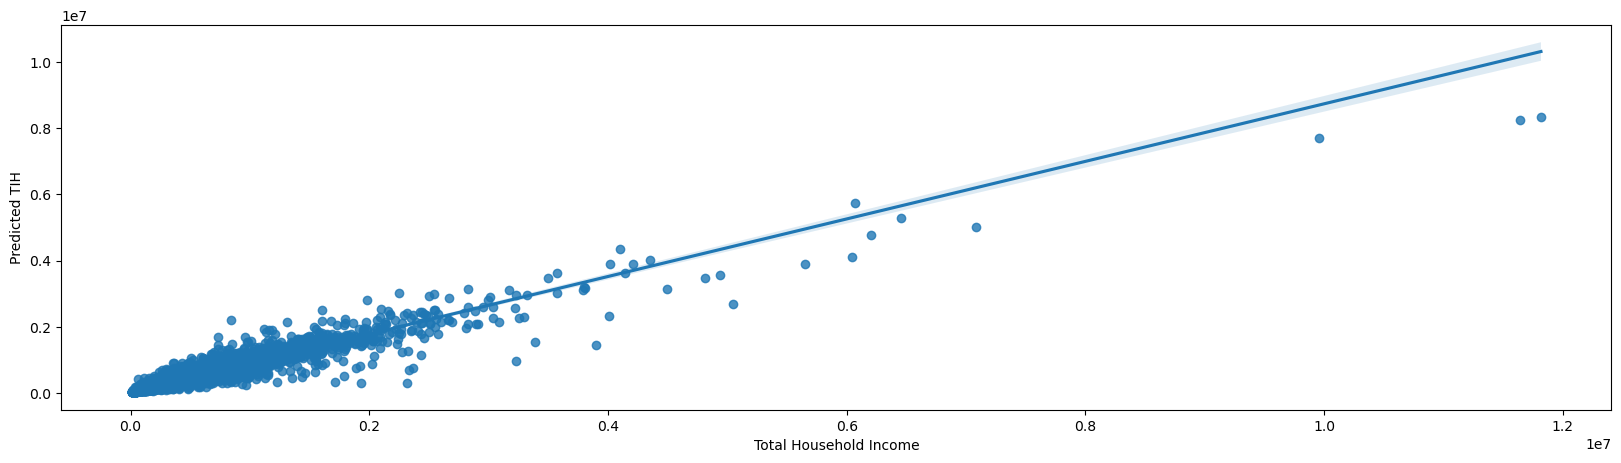

In [49]:
randomforest_predict=randomforest.predict(X)
mean_squared_error(Y,randomforest_predict)
plt.figure(figsize=(20,5))
ax=sns.regplot(x=Y, y=randomforest_predict)
ax.set(xlabel='Total Household Income', ylabel='Predicted TIH')

In [50]:
# K Nearest Neighbors Regressor
knearestneighbor = KNeighborsRegressor(n_neighbors=15, n_jobs=-1, leaf_size=50)
knearestneighbor.fit(X_train,y_train)

KNeighborsRegressor(leaf_size=50, n_jobs=-1, n_neighbors=15)

In [51]:
knearestneighbor.score(X_test, y_test)

0.70798304763341

[Text(0.5, 0, 'Total Household Income'), Text(0, 0.5, 'Predicted TIH')]

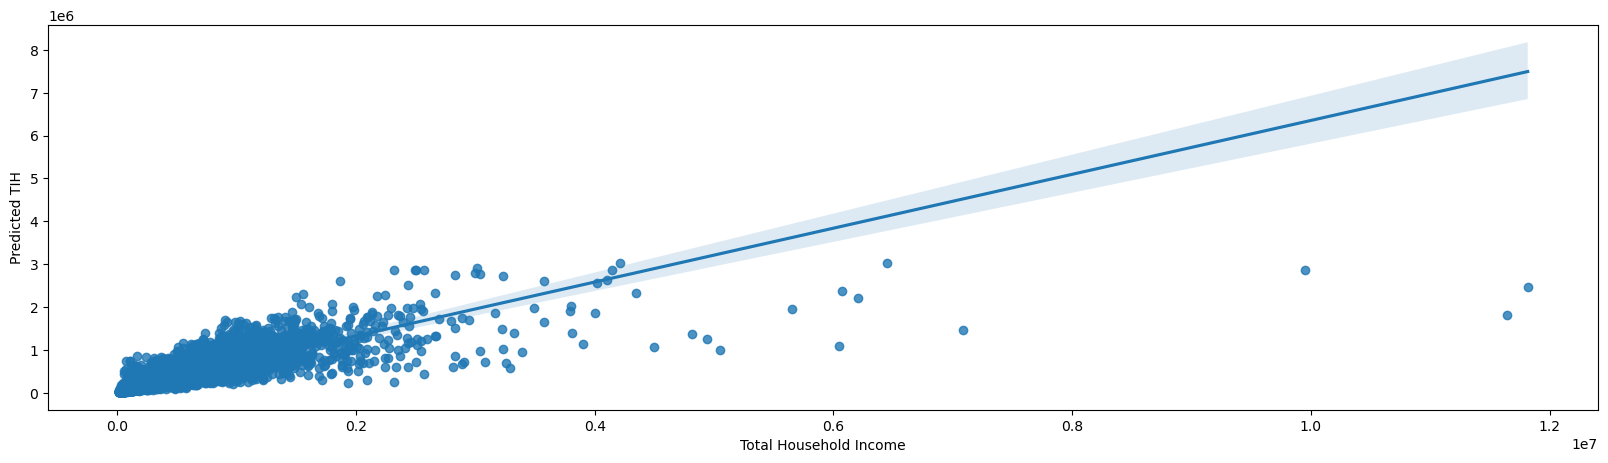

In [54]:
knearestneighbor_predict=knearestneighbor.predict(X)
mean_squared_error(Y, knearestneighbor_predict)
plt.figure(figsize=(20,5))
ax=sns.regplot(x=Y, y=knearestneighbor_predict)
ax.set(xlabel='Total Household Income', ylabel='Predicted TIH')

In [60]:
xgbr = XGBRegressor(nthread = -1, eta=0.1, subsample=0.5)
xgbr.fit(X_train, y_train)

xgbr.score(X_test, y_test)

y_xgbr_predict = xgbr.predict(X)
mean_squared_error(y, y_xgbr_predict)
sns.regplot(x=y, y = y_xgbr_predict)
plt.figure(figsize=(20,5))

NameError: name 'XGBRegressor' is not defined

In [61]:
# Predicting household income bracket through classification
class_fid = income_data.loc[: , ['Household Head Sex' ,'Household Head Age' ,'Household Head Marital Status' ,
                                        'Household Head Highest Grade Completed' ,'Household Head Job or Business Indicator' ,
                                        'Household Head Class of Worker' ,'Type of Household' ,'Total Number of Family members' ,
                                        'Total number of family members employed' ,'Type of Building/House' ,'Type of Roof' ,'Type of Walls' ,
                                        'House Floor Area' ,'House Age' ,'Number of bedrooms' ,'Tenure Status' ,'Toilet Facilities' ,'Electricity' ,
                                        'Main Source of Water Supply' ,'Number of Television' ,'Number of CD/VCD/DVD' ,'Number of Component/Stereo set' ,
                                        'Number of Refrigerator/Freezer' ,'Number of Washing Machine' ,'Number of Airconditioner' ,'Number of Car, Jeep, Van' ,
                                        'Number of Landline/wireless telephones' ,'Number of Cellular phone' ,'Number of Personal Computer' ,
                                        'Number of Stove with Oven/Gas Range' ,'Number of Motorized Banca' ,'Number of Motorcycle/Tricycle' ]]

In [62]:
class_fid_cat = []
for col in class_fid.columns :
    if class_fid[col].dtype == object :
        class_fid_cat.append(col)
        print(col," : ",len(class_fid[col].value_counts()))

Household Head Sex  :  2
Household Head Marital Status  :  6
Household Head Highest Grade Completed  :  46
Household Head Job or Business Indicator  :  2
Household Head Class of Worker  :  7
Type of Household  :  3
Type of Building/House  :  6
Type of Roof  :  7
Type of Walls  :  6
Tenure Status  :  8
Toilet Facilities  :  7
Main Source of Water Supply  :  11


In [64]:
for item in income_data['Household Head Highest Grade Completed'].value_counts().index :
    print(".", item)

. High School Graduate
. Elementary Graduate
. Grade 4
. Grade 5
. Second Year High School
. Grade 3
. Third Year High School
. Business and Administration Programs
. Second Year College
. Grade 2
. First Year High School
. No Grade Completed
. Third Year College
. Teacher Training and Education Sciences Programs
. First Year College
. Grade 1
. Engineering and Engineering Trades Programs
. Engineering and Engineering trades Programs
. Health Programs
. Computing/Information Technology Programs
. Security Services Programs
. Post Baccalaureate
. Grade 6
. Agriculture, Forestry, and Fishery Programs
. Transport Services Programs
. Second Year Post Secondary
. Social and Behavioral Science Programs
. Fourth Year College
. First Year Post Secondary
. Personal Services Programs
. Humanities Programs
. Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree
. Law Programs
. Basic Programs
. 

In [65]:
educ_attainment = { 'DNA/Primary/Elementary' : ['Elementary Graduate', 'Grade 4', 'Grade 5', 'Grade 3', 'Grade 2', 'Grade 1', 'Grade 6', 'No Grade Completed', 'Preschool'], 
                    'Secondary' : ['High School Graduate', 'Second Year High School', 'Third Year High School', 'First Year High School'],
                    'Attended College' : ['Second Year College', 'Third Year College', 'First Year College', 'Second Year Post Secondary', 'Fourth Year College', 'First Year Post Secondary'],
                    'Post Baccalaureate' : ['Post Baccalaureate'], 
                    'Degrees/Programs' : ['Business and Administration Programs', 'Teacher Training and Education Sciences Programs', 'Engineering and Engineering Trades Programs', 'Engineering and Engineering trades Programs', 'Engineering and Engineering trades Programs', 'Health Programs', 'Computing/Information Technology Programs', 'Security Services Programs', 'Agriculture, Forestry, and Fishery Programs',
                                  'Transport Services Programs', 'Social and Behavioral Science Programs', 'Social and Behavioral Science Programs', 'Personal Services Programs', 'Humanities Programs', 'Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree',
                                  'Law Programs', 'Architecture and Building Programs', 'Basic Programs', 'Journalism and Information Programs', 'Arts Programs', 'Life Sciences Programs', 'Manufacturing and Processing Programs',
                                  'Social Services Programs', 'Physical Sciences Programs', 'Other Programs of Education at the Third Level, First Stage, of the Type that Leads to a Baccalaureate or First University/Professional Degree (HIgher Education Level, First Stage, or Collegiate Education Level)',
                                  'Veterinary Programs', 'Environmental Protection Programs'
                                 ]
                    }

In [66]:
income_data['Household Head Highest Grade Completed (Simplified)'] = income_data['Household Head Highest Grade Completed'].apply(lambda x : ''.join([key for key in educ_attainment.keys() if x in educ_attainment[key]]))

In [67]:
income_data.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Electricity,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,Household Head Highest Grade Completed (Simplified)
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1,Degrees/Programs
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,3,0,1,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2,Degrees/Programs
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,Single Family,6,0,4,3,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...",0,"Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0,DNA/Primary/Elementary
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,Single Family,3,0,3,2,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,1,"Own use, faucet, community water system",1,0,0,0,0,0,0,0,1,0,0,0,0,DNA/Primary/Elementary
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,Male,65,Married,Elementary Graduate,With Job/Business,General managers/

In [68]:
income_data['Total Household Income'].describe()

count    4.154400e+04
mean     2.475556e+05
std      2.868805e+05
min      1.128500e+04
25%      1.048950e+05
50%      1.640795e+05
75%      2.911385e+05
max      1.181599e+07
Name: Total Household Income, dtype: float64

In [69]:
income_data['Income Category'] = pd.qcut(income_data['Total Household Income'], q=4, labels=['Category 1', 'Category 2', 'Category 3', 'Category 4'])

In [70]:
income_data

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Electricity,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,Household Head Highest Grade Completed (Simplified),Income Category
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1,Degrees/Programs,Category 4
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,3,0,1,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2,Degrees/Programs,Category 3
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,Single Family,6,0,4,3,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...",0,"Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0,DNA/Primary/Elementary,Category 1
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,Single Family,3,0,3,2,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,1,"Own use, faucet, community water system",1,0,0,0,0,0,0,0,1,0,0,0,0,DNA/Primary/Elementary,Category 2
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,Male,65,Mar